# Teste de hipótese

Um teste de hipótese é um procedimento estatístico usado para tomar decisões com base em dados amostrais. O teste de hipótese responde perguntas como:
* Os dados sustentam essa afirmação?
* Essa diferença é real ou pode ter ocorrido por acaso?
* Esse valor observado é esperado ou raro?.

É importante frisar que um teste de hipótese não prova verdades absolutas, mas sim avalia evidências.

## Hipóteses H0 e H1

Todo teste começa com 2 hipóteses
* Hipótese nula (H0), que representa o estado atual. Ou seja, sem diferença.
* Hipótese alternativa (H1), que representa o que queremos investigar, se existe efeito ou diferença.

Exemplos:
* H0: A altura média da população é de 170cm
* H1: A altura média da população não é 170cm.

Sempre testamos contra a hipótese nula.

## Idéia central do teste de hipótese

A lógica é simples: Se H0 fosse verdadeira, quão provável seria observar esses dados. Muito provável: mantemos H0. Pouco provável: rejeitamos H0.

## p-valor

O p-valor é a probabilidade de observar um valor tão extremo quanto o observado, assumindo que a hipótese nula é a verdadeira. Ou seja, "se H0 for verdade, qual a chance de ver algo assim?"

Podemos interpretar o p-valor da seguinte maneira:
* p-valor pequena (por exemplo 0.01), significa forte evidência contra H0. Rejeitamos H0
* p-valor grande (por exemplo, 0.30), significa que existem dados confiáveis com H0. Não rejeitamos.

Exemplo prático:

Acredita-se que a altura média seja 170cm. Coletamos uma amostra de 100 pessoas. Queremos verificar se a média mudou.

Média amostral: 170.96
Estatística de Z: 1.06.
Não rejeitamos H0 ao nível de 5%


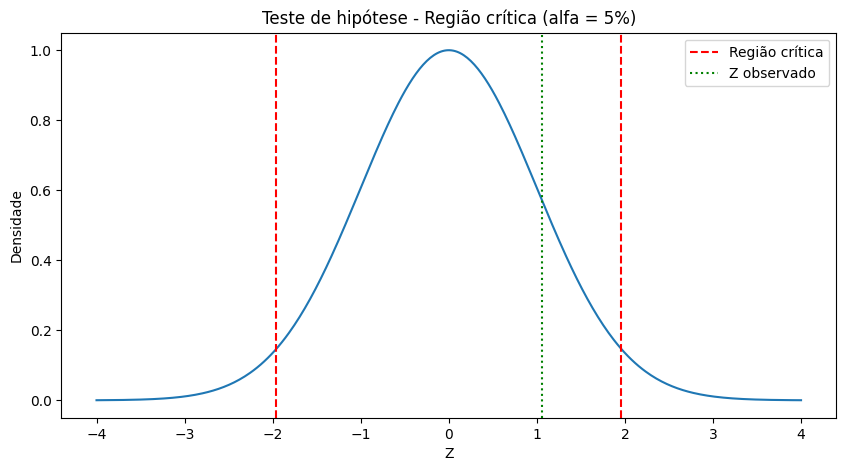

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a amostragem
np.random.seed(42)
amostra = np.round(np.random.normal(loc=172, scale=10, size=100), 1)

df = pd.DataFrame(amostra, columns=['altura'])

media_amostral = df['altura'].mean()
desvio_amostral = df['altura'].std()
n = len(df)

print(f"Média amostral: {media_amostral:.2f}")

# Definindo a hipótese
media_h0 = 170

z = (media_amostral - media_h0) / (desvio_amostral / np.sqrt(n))
# Z = 0     -> Exatamente igual ao esperado
# Z = 0.5   -> O valor é muito comum
# Z = 1     -> O valor é comum
# Z = 2     -> O valor é raro
# Z = 3     -> O valor é extremamente raro
print(f"Estatística de Z: {z:.2f}.")

# 95% da distribuição está entre -1.96 e 1.96
if (abs(z)) > 1.96:
    print("Rejeitamos H0 ao nível do 5%")
else:
    print("Não rejeitamos H0 ao nível de 5%")

# Visualização conceitual da região
x = np.linspace(-4, 4, 400)
y = np.exp(-x**2 / 2)

plt.figure(figsize=(10, 5))
plt.plot(x, y)

# Linhas da região
plt.axvline(-1.96, color='red', linestyle='--', label='Região crítica')
plt.axvline(1.96, color='red', linestyle='--')

# Estatística Z
plt.axvline(z, color='green', linestyle=':', label='Z observado')

plt.title("Teste de hipótese - Região crítica (alfa = 5%)")
plt.xlabel('Z')
plt.ylabel('Densidade')
plt.legend()
plt.show()